# **03.K-means Code 실습**

[목적]
  - 비지도학습 중 하나인 Clustering 중 K-means Clustering 실습
  - ForLoop 활용 K의 Range를 변경 시켜가며 실습 진행
  - Clustering은 기본적으로 Data가 많을 때 시간이 굉장히 오래걸림
     - Distance Matrix를 만들고 행렬 계산을 하는 알고리즘이 많기 때문

[Process]
  1. Define X's
  2. Modeling

K-means는 가장 널리 사용되는 군집화(clustering) 알고리즘 중 하나입니다. 주어진 데이터를 'K' 개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 작동합니다. 다음은 주어진 프로세스에 대한 자세한 설명입니다.

- Define X's:

  - 데이터를 준비합니다. 여기서 X는 특성(feature) 데이터를 의미하며, 주로 군집화할 대상이 되는 데이터 포인트들입니다. 데이터는 전처리 과정을 거친 후에 사용되며, 이 과정에서 정규화나 표준화와 같은 스케일링 작업을 거칠 수 있습니다.
- Modeling:

  - 초기화: K-means는 초기 중심점(centroid)를 어떻게 설정하느냐에 따라 결과가 크게 달라질 수 있습니다. 이 중심점은 데이터 포인트 중 임의로 선택되거나 다른 방법을 사용하여 선택될 수 있습니다.

  - 할당 단계: 각 데이터 포인트를 가장 가까운 중심점에 할당합니다. 이 때, 가까움은 일반적으로 유클리디안 거리로 측정됩니다.

  - 업데이트 단계: 각 그룹의 평균을 계산하여 새로운 중심점을 정합니다.

  - 반복: 할당과 업데이트 단계를 수렴할 때까지(즉, 중심점이 더 이상 크게 바뀌지 않을 때까지) 또는 정해진 횟수만큼 반복합니다.

  - 최적의 K 찾기: 클러스터의 수 'K'는 사용자가 정해야 하는 매개변수입니다. ForLoop를 사용하여 여러 K 값을 시도해보고, 각각의 결과에 대한 군집 내 분산의 합 (SSE, Sum of Squared Errors)과 같은 지표를 기반으로 최적의 K 값을 찾을 수 있습니다. 일반적으로 'Elbow Method'를 사용하여 SSE가 급격히 줄어들다가 완만해지는 지점('elbow')을 최적의 K 값으로 선택하기도 합니다.

데이터의 양이 많을 경우 K-means 알고리즘이 느려질 수 있습니다. 이는 모든 데이터 포인트에 대해 중심점까지의 거리를 계산해야 하기 때문입니다. 이 문제를 해결하기 위해 Mini-Batch K-means와 같은 변형된 알고리즘을 사용하기도 합니다.

기억할 점은 K-means가 국지적인 최적해에 빠질 수 있으므로, 여러 번 실행하여 다양한 초기 중심점을 시도하고 최선의 결과를 선택하는 것이 좋습니다.

In [8]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

[기존 Classification Data 활용]
  - Clustering 후 Label과 비교

In [9]:
#loding the iris dataset
data = load_iris()

In [10]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
# X's & Y Split
Y = pd.DataFrame(data['target'], columns = ['Target'])
X = pd.DataFrame(data['data'], columns = data['feature_names'])

In [14]:
X.shape

(150, 4)

In [15]:
data= pd.concat([X, Y], axis=1)

In [16]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[Clustering 전 Scaling]
  - Clustering은 Distance를 구하는 작업이 필요함
  - Feature들의 Scale이 다르면 Distance를 구하는데 가중치가 들어가게 됨
  - 따라서, Distance 기반의 Clustering의 경우 Scaling이 필수

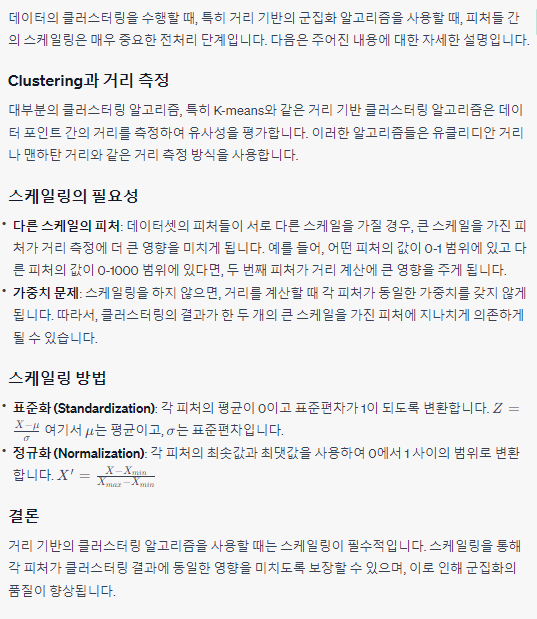

In [17]:
# Scaling
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [18]:
X_scal

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


[차원축소]
  - Clustering의 결과를 확인하기 위하여 차원 축소 진행
  - 다음 Chapter에서 차원축소에 대해 자세히 설명할 예정

In [19]:
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))

>>>> PCA Variance : [0.92461872 0.05306648]


- pca = PCA(n_components=2).fit(X)
  - 여기서는 PCA 클래스를 초기화하며, n_components 파라미터를 통해 주성분의 개수를 2로 설정합니다. 이는 데이터를 2차원으로 축소한다는 의미입니다. 그리고 fit(X) 메소드는 데이터 X에 PCA를 적용합니다.
- X_PCA = pca.fit_transform(X)
  - fit_transform 메소드를 사용하여 데이터 X를 위에서 초기화한 PCA 객체를 활용하여 변환하고, 그 결과를 X_PCA 변수에 저장합니다. 이 결과는 원본 데이터를 2차원 공간에 투영한 것입니다.
- X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
  - 2차원으로 축소된 데이터 X_PCA를 pandas DataFrame으로 변환합니다. 각 주성분 축에 해당하는 컬럼 이름으로 'AXIS1' 및 'AXIS2'를 지정합니다.
- print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))
  - explained_variance_ratio_ 속성은 각 주성분이 데이터 분산을 얼마나 설명하는지 나타내는 값입니다. 여기서는 두 개의 주성분 각각이 설명하는 분산의 비율을 출력합니다. 이 값은 데이터의 원래 특성 중 얼마나 많은 정보를 보존하고 있는지에 대한 인사이트를 제공합니다.

요약하면, 이 코드는 데이터 X의 차원을 2차원으로 축소하기 위해 PCA를 적용하고, 결과를 pandas DataFrame으로 변환하여 저장한 후, 각 주성분이 설명하는 분산의 비율을 출력하는 코드입니다.

[K-means]
  - Hyperparameter Tuning using for Loop

[K-means Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  - n_clusters : Cluster 개수 (K)
  - n_init : Number of times the k-means algorithm is run with different centroid seeds
    - K-means는 Step2에서 '초기 중심점 설정'이라는 작업을 하는데, 초기 중심점을 셋팅하는 것에 따라 군집의 Quality가 달라짐
    - 따라서 여러번 시도해 보는것
    - default = 10
  - max_iter : 몇번 Round를 진행할 것 인지
    - Round
       - Step 4: 중심점 재설정
       - Step 5: 데이터를 군집에 재할당
    - 이러한 Round를 최대 몇번까지 돌것인가?
    - default = 300
       - 300번 안에 중심점 움직임이 멈추지 않으면 그냥 STOP


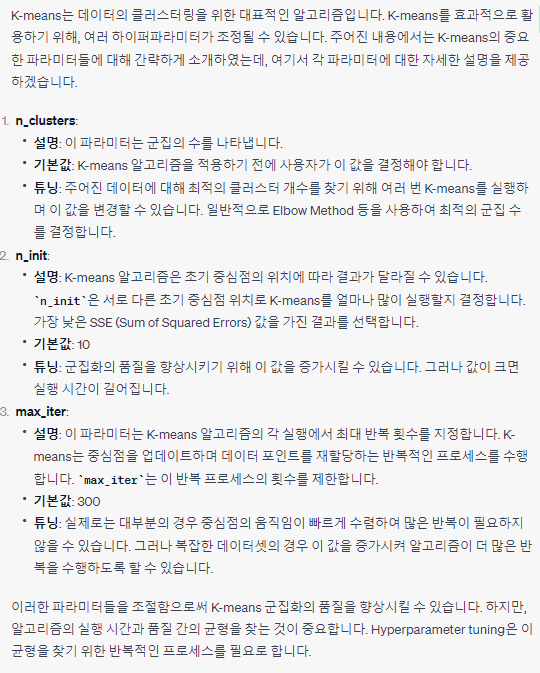

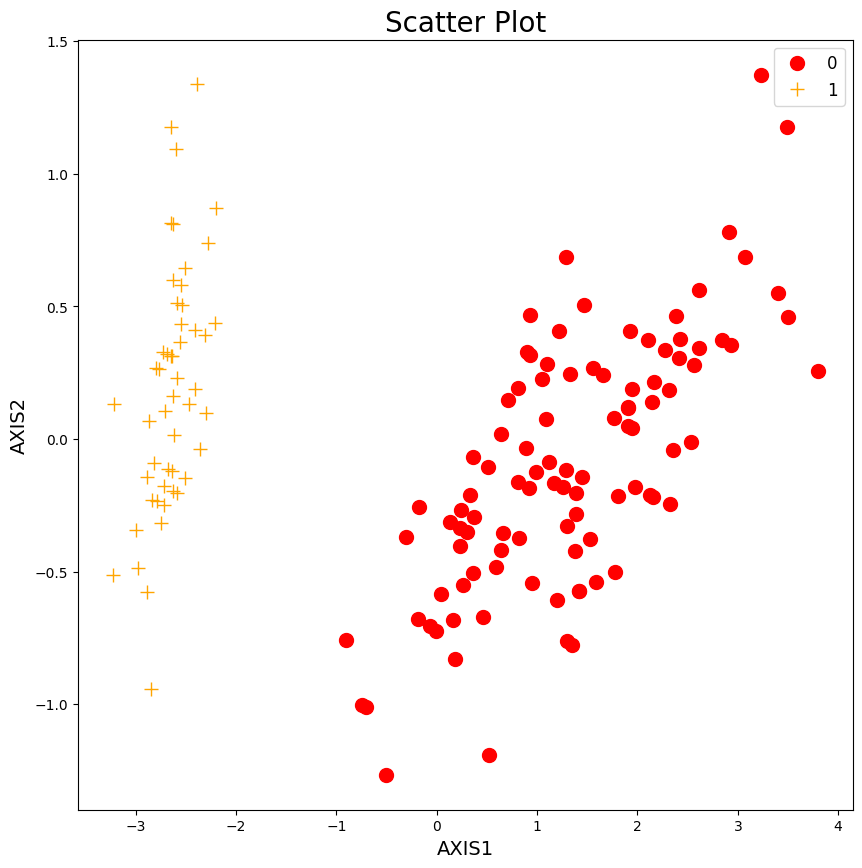

---------------------------------------------------------------------------------------------------


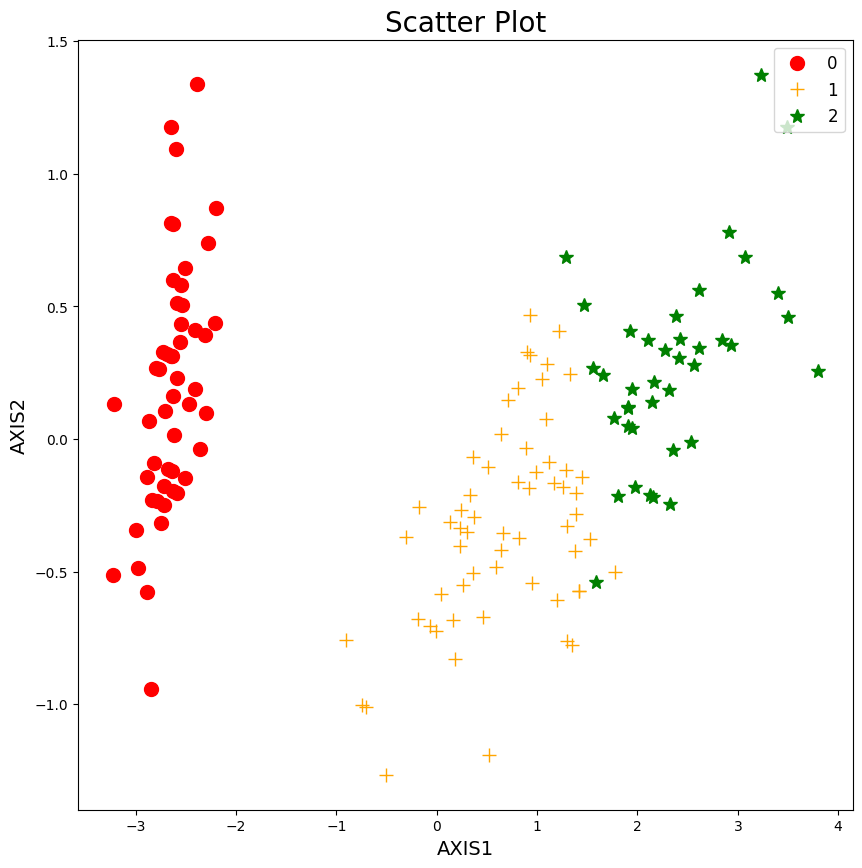

---------------------------------------------------------------------------------------------------


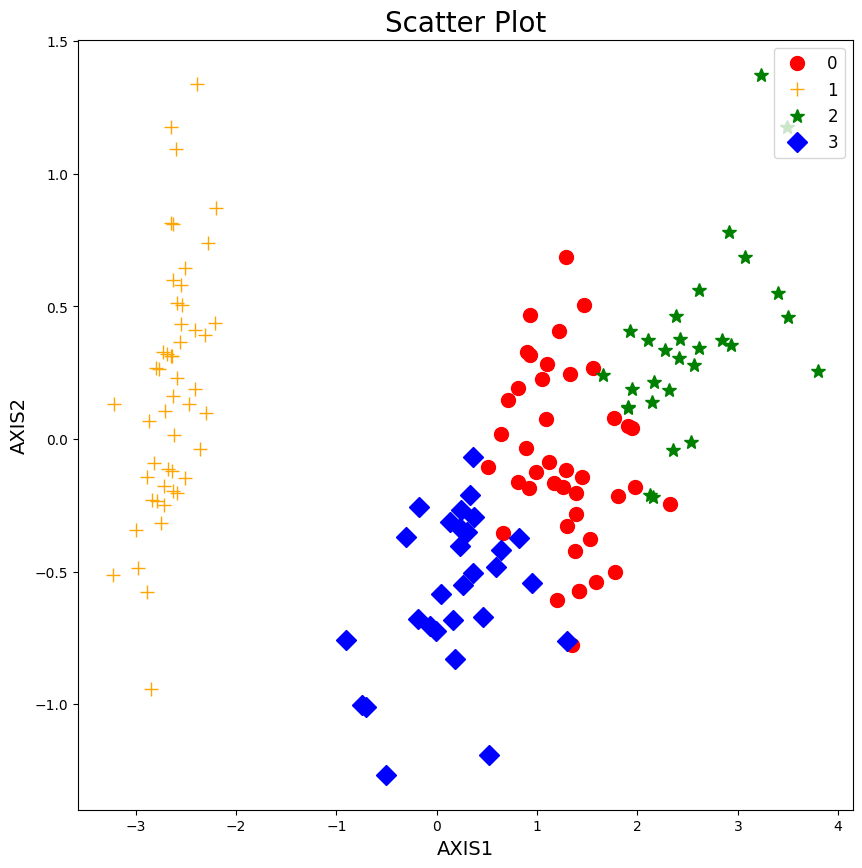

---------------------------------------------------------------------------------------------------


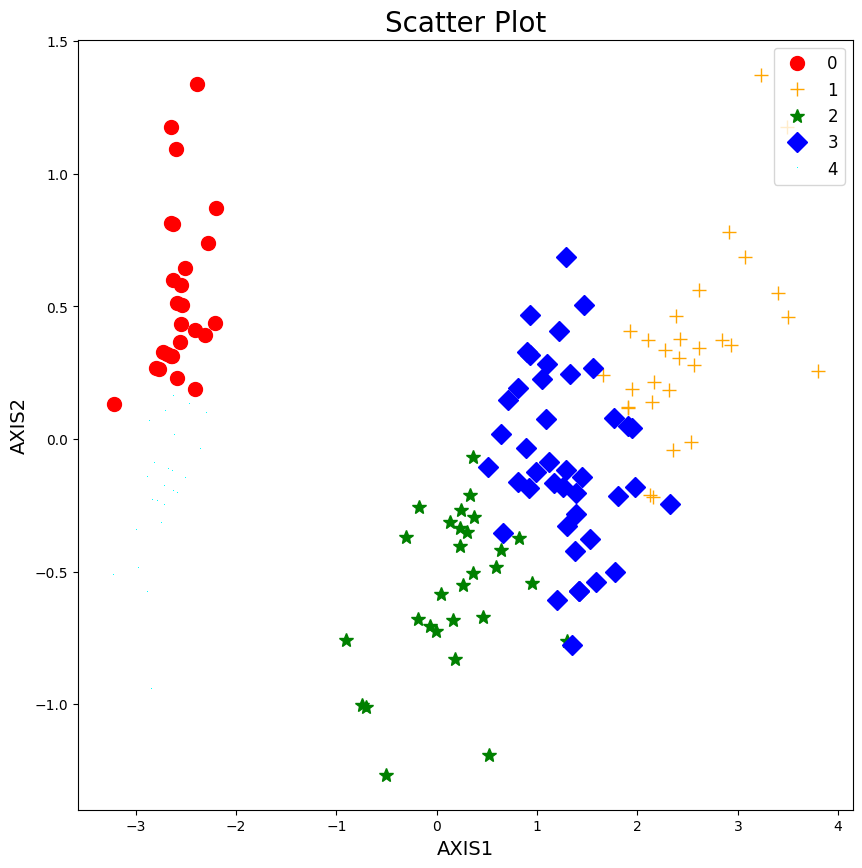

---------------------------------------------------------------------------------------------------


In [20]:
# K-means Modeling
for cluster in list(range(2, 6)):
    Cluster = KMeans(n_clusters=cluster).fit(X_scal)
    labels = Cluster.predict(X_scal)

    # label Add to DataFrame
    data['{} label'.format(cluster)] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    # Plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yellow', 'grey', 'orchid', 'lightpink']

    fig, ax = plt.subplots(figsize=(10,10))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'],
                group['AXIS2'],
                marker=mar[j],
                linestyle='',
                label=name,
                c = colo[j],
                ms=10)
        ax.legend(fontsize=12, loc='upper right') # legend position
    plt.title('Scatter Plot', fontsize=20)
    plt.xlabel('AXIS1', fontsize=14)
    plt.ylabel('AXIS2', fontsize=14)
    plt.show()
    print("---------------------------------------------------------------------------------------------------")

    gc.collect()

- for cluster in list(range(2, 6)):
  - 2부터 5까지의 클러스터 수를 가지고 K-means 알고리즘을 반복적으로 실행합니다.
- Cluster = KMeans(n_clusters=cluster).fit(X_scal) <br> labels = Cluster.predict(X_scal)
  - 주어진 클러스터 수를 사용하여 K-means 모델을 학습하고, 데이터 포인트의 군집 레이블을 예측합니다.
- data['{} label'.format(cluster)] = labels
  - 원본 data DataFrame에 각 클러스터링 결과를 나타내는 레이블을 추가합니다.
- labels = pd.DataFrame(labels, columns=['labels']) <br>
plot_data = pd.concat([X_EMM, labels], axis=1) <br>
groups = plot_data.groupby('labels')
  - labels를 DataFrame 형태로 변환한 후 X_EMM과 결합하여 plot_data를 생성합니다. 그런 다음 labels별로 그룹화합니다.
- 다양한 마커와 색상을 사용하여 각 군집을 구분하며, 2차원 공간에 데이터 포인트를 플롯합니다.
- gc.collect()
  - gc.collect()를 사용하여 불필요한 객체를 메모리에서 제거하고 가비지 컬렉션을 강제로 실행합니다. 이는 메모리 사용량을 최적화하는데 도움을 줍니다.

요약하면, 이 코드는 2부터 5까지 다양한 클러스터 수를 사용하여 K-means 클러스터링을 실행하고, 그 결과를 2D 스캐터 플롯으로 시각화하는 것입니다.

In [21]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,2 label,3 label,4 label,5 label
0,5.1,3.5,1.4,0.2,0,1,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0,1,4
2,4.7,3.2,1.3,0.2,0,1,0,1,4
3,4.6,3.1,1.5,0.2,0,1,0,1,4
4,5.0,3.6,1.4,0.2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,2,2,1
146,6.3,2.5,5.0,1.9,2,0,1,0,3
147,6.5,3.0,5.2,2.0,2,0,2,0,3
148,6.2,3.4,5.4,2.3,2,0,2,2,1


In [22]:
# Confusion Matrix 확인
cm = confusion_matrix(data['Target'], data['3 label'])
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
